# Setup 

In [4]:

#!conda install scipy -y
#!conda install statsmodels -y

## Imports

In [5]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf


## Load Penguinds dataset

In [6]:
url = "https://tinyurl.com/emat-peng"
peng = pd.read_csv(url)

## Clean dataset
Remove NA values from columns "body_mass_g", "flipper_length_mm", "species" <br>
any row where body_mass_g, flipper_length_mm, or species is missing will be removed.<br>
`.copy()` Creates a new independent copy of the cleaned DataFrame instead of just returning a view of the original data.

In [7]:
peng = peng.dropna(subset=["body_mass_g","flipper_length_mm","species"]).copy()

In [8]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Description & Correlation

## Description: what do we have?

### Describe `body_mass_g`

In [22]:
desc_mass = stats.describe(peng["body_mass_g"])
print("body_mass_g:", desc_mass)

body_mass_g: DescribeResult(nobs=np.int64(342), minmax=(np.float64(2700.0), np.float64(6300.0)), mean=np.float64(4201.754385964912), variance=np.float64(643131.0773267479), skewness=np.float64(0.4682639641669921), kurtosis=np.float64(-0.7262425917239979))


### Describe `flipper_length_mm`

In [23]:
desc_flipper = stats.describe(peng["flipper_length_mm"])
print("flipper_length_mm:", desc_flipper)

flipper_length_mm: DescribeResult(nobs=np.int64(342), minmax=(np.float64(172.0), np.float64(231.0)), mean=np.float64(200.91520467836258), variance=np.float64(197.7317916002126), skewness=np.float64(0.3441638335300089), kurtosis=np.float64(-0.987434426797829))


### Grouped description by species and island

In [25]:
# Grouped description by species
group_by_species = peng.groupby("species")[["body_mass_g", "flipper_length_mm", "bill_length_mm", "bill_depth_mm"]].describe()

#group_by_species, group_by_island
print(group_by_species)



          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          151.0  3700.662252  458.566126  2850.0  3350.0  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          123.0  5076.016260  504.116237  3950.0  4700.0  5000.0   

                          flipper_length_mm              ... bill_length_mm  \
              75%     max             count        mean  ...            75%   
species                                                  ...                  
Adelie     4000.0  4775.0             151.0  189.953642  ...         40.750   
Chinstrap  3950.0  4800.0              68.0  195.823529  ...         51.075   
Gentoo     5500.0  6300.0             123.0  217.186992  ...         49.550   

                bill_depth_mm                                                \
 

In [26]:
# Grouped description by island
group_by_island  = peng.groupby("island")[["body_mass_g", "flipper_length_mm"]].describe()
print(group_by_island)

          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
island                                                                   
Biscoe          167.0  4716.017964  782.855743  2850.0  4200.0  4775.0   
Dream           124.0  3712.903226  416.644112  2700.0  3400.0  3687.5   
Torgersen        51.0  3706.372549  445.107940  2900.0  3337.5  3700.0   

                           flipper_length_mm                                \
               75%     max             count        mean        std    min   
island                                                                       
Biscoe     5325.00  6300.0             167.0  209.706587  14.142268  172.0   
Dream      3956.25  4800.0             124.0  193.072581   7.507366  178.0   
Torgersen  4000.00  4700.0              51.0  191.196078   6.232238  176.0   

                                        
              25%    50%    75%    max  
isla

## Quick univariate visuals (always look at the data)

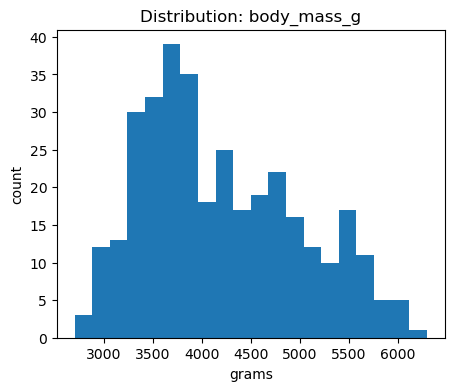

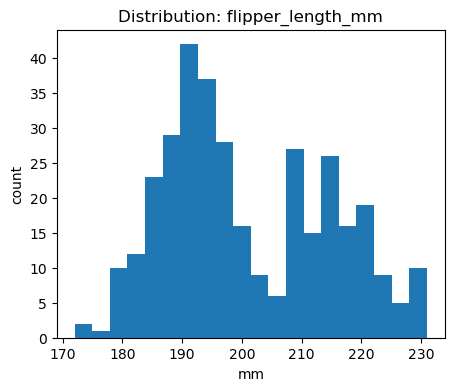

In [27]:
plt.figure(figsize=(5,4))
plt.hist(peng["body_mass_g"], bins=20)
plt.title("Distribution: body_mass_g")
plt.xlabel("grams"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(5,4))
plt.hist(peng["flipper_length_mm"], bins=20)
plt.title("Distribution: flipper_length_mm")
plt.xlabel("mm"); plt.ylabel("count")
plt.show()

In [9]:
r_all, p_all = stats.pearsonr(peng["flipper_length_mm"], peng["body_mass_g"])
print(f"Pooled Pearson r = {r_all:.3f}, p = {p_all:.3g}")

Pooled Pearson r = 0.871, p = 4.37e-107


## Plot

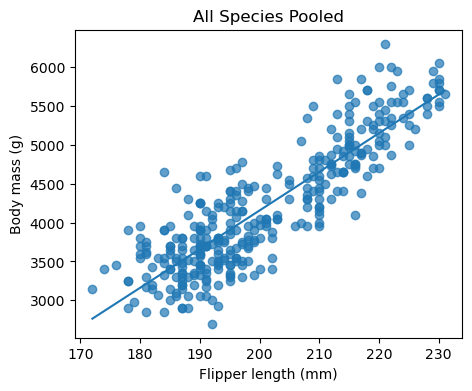

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(peng["flipper_length_mm"], peng["body_mass_g"], alpha=0.7)
# Plot line
m,b = np.polyfit(peng["flipper_length_mm"], peng["body_mass_g"], 1)
xs = np.linspace(peng["flipper_length_mm"].min(), peng["flipper_length_mm"].max(), 200)
plt.plot(xs, m*xs + b)

plt.xlabel("Flipper length (mm)"); plt.ylabel("Body mass (g)")
plt.title("All Species Pooled")
plt.show()

## Analyze the data

<b>When we pool all penguins, we see a strong positive association between flipper length and body mass. But that picture mixes species differences with within-species trends<b>

- See a strong positive trend: heavier penguins tend to have longer flippers
- But species differ in size:
Gentoo are generally larger; Adelie are smaller; Chinstrap in between. If you mix species, your “one big trend” blends between-species differences with within-species relationships

Does out analysis account for that?

## Groupwise medians (species differences)

In [11]:
peng.groupby("species")[["flipper_length_mm","body_mass_g"]].median()

,flipper_length_mm,body_mass_g
species,,
Adelie,190.0,3700.0
Chinstrap,196.0,3700.0
Gentoo,216.0,5000.0


In [12]:
for sp, g in peng.groupby("species"):
    r,p = stats.pearsonr(g["flipper_length_mm"], g["body_mass_g"])
    print(f"{sp:9s}  r={r:.3f}, p={p:.3g}")

Adelie     r=0.468, p=1.34e-09
Chinstrap  r=0.642, p=3.75e-09
Gentoo     r=0.703, p=1.33e-19


### Analyze the data
Now, is there a strong correlation?

## Plot 

In [13]:
import altair as alt
chart = (
    alt.Chart(peng)
    .mark_point(opacity=0.7)
    .encode(x="flipper_length_mm:Q", y="body_mass_g:Q", color="species:N")
)
chart


alt.Chart(...)

In [14]:
trend = (
    alt.Chart(peng)
    .transform_regression("flipper_length_mm", "body_mass_g", groupby=["species"])
    .mark_line()
    .encode(x="flipper_length_mm:Q", y="body_mass_g:Q", color="species:N")
)
trend

alt.Chart(...)

In [15]:
#(chart + trend).properties(width=450, height=320, title="Within-Species Trends")

## What does this tell us?

- Look at the medians: Gentoo are heavier with longer flippers on average, so they shift the cloud upward and right. That inflates the pooled slope.
- Within each species, the relationship remains positive, but the strength and slope differ. That’s why I either stratify plots/tables or include species in my model
  
<b>Simpson’s-paradox</b>
A trend seen in the combined data reverses (or changes a lot) when you look within groups

- <b>Pooled view:</b> All species together show a strong positive association, longer flippers = heavier penguins.

- <b>Groupwise view:</b> Each species (Adelie, Chinstrap, Gentoo) has its own center and slope. Because species differ in average size, mixing them can exaggerate, mute, or even flip the pooled slope.

- In real penguins, the direction usually stays positive, but the magnitude can shift a lot—those are the paradox vibes: the pooled story is not the within species story.

- Re-plot or summarize within each species. You’ll still see positive relationships, but slopes and centers differ across species. This shows why we should stratify (or control for species in a model) before concluding “flipper length predicts mass.”

# Modeling with statsmodels (OLS): Pooled model vs. model controlling for species


## Ordinary Least Squares (OLS) regression using statsmodels formula API

### Pooled Model
- Dependent variable (y): `body_mass_g`
- Independent variable (x): `flipper_length_mm`

So it models:
`body_mass_g = β₀ + β₁ × flipper_length_mm + error`

This is our <b>pooled model<b>, treating all penguins as if they come from one population, ignoring species differences.


In [16]:
m_pooled = smf.ols("body_mass_g ~ flipper_length_mm", data=peng).fit()
print(m_pooled.summary().tables[1])  # coefficients only


                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.815    -18.903      0.000   -6382.358   -5179.305
flipper_length_mm    49.6856      1.518     32.722      0.000      46.699      52.672


### Results
- flipper_length_mm : 49.69 - for each 1 mm increase in flipper length, body mass increases by ~50 g on average
- coef : for now think of it as a constant
- t = 32.7, p < 0.001  Very strong, significant positive relationship

### The control model
Now, we include species as a categorical variable (`C(species)`), which adds dummy variables for each species. <br>
This model:<br>
`body_mass_g = β₀ + β₁ × flipper_length_mm + β₂ × Chinstrap + β₃ × Gentoo + error`
it allows different intercepts for each species but assumes the same slope for flipper length across species.

In [17]:
m_ctrl   = smf.ols("body_mass_g ~ flipper_length_mm + C(species)", data=peng).fit()

print(m_ctrl.summary().tables[1])

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4031.4769    584.151     -6.901      0.000   -5180.507   -2882.447
C(species)[T.Chinstrap]  -206.5101     57.731     -3.577      0.000    -320.067     -92.954
C(species)[T.Gentoo]      266.8096     95.264      2.801      0.005      79.425     454.194
flipper_length_mm          40.7054      3.071     13.255      0.000      34.665      46.746


### Results

- When we add C(species) to the regression—or allow interactions—the coefficient on flipper length changes. That’s the effect of controlling for a confounder
  
Note Adelies are considered as baseline for the sake of analysis.
- coef : for now think of it as a constant
- C(species)[T.Chinstrap] : -206.51  - Chinstrap penguins are ~207 g lighter than Adelies (holding flipper length constant) notice the negative sign
- C(species)[T.Gentoo] : +266.81 - Gentoo penguins are ~267 g heavier than Adelies (holding flipper length constant)
- flipper_length_mm : 40.71 - For every extra mm in flipper length, body mass increases by ~41 g, after accounting for species differences
- all p-values < 0.01 → these effects are statistically significant

### Takeaway
Controlling for species reveals that part of the correlation between flipper length and body mass was due to species differences, not just within-species variation.
